# Introduction to Data Visualization / Veri Görselleştirme Giriş

# Seaborn
- Görselleştirme hem insanlar anlaması için hem de etkilemesi için.

##### *Kaynaklar*
* https://seaborn.pydata.org/examples/index.html

* https://www.kaggle.com/datasets/kwullum/fatal-police-shootings-in-the-us




In [5]:
import numpy as np # lineer algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns # visualization tool
from collections import Counter
%matplotlib inline

In [6]:
import chardet

# Dosyanın Kodlamasını Otomatik Olarak Tespit Etme Fonksiyonu
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# Dosya Kodlamasını Belirleme ve Dosyaları Okuma
median_house_hold_in_come_encoding = detect_encoding('/content/drive/MyDrive/Colab Notebooks/Data Visualization/datas/MedianHouseholdIncome2015.csv')
percentage_people_below_poverty_level_encoding = detect_encoding('/content/drive/MyDrive/Colab Notebooks/Data Visualization/datas/PercentagePeopleBelowPovertyLevel.csv')
percent_over_25_completed_highSchool_encoding = detect_encoding('/content/drive/MyDrive/Colab Notebooks/Data Visualization/datas/PercentOver25CompletedHighSchool.csv')
share_race_city_encoding = detect_encoding('/content/drive/MyDrive/Colab Notebooks/Data Visualization/datas/ShareRaceByCity.csv')
kill_encoding = detect_encoding('/content/drive/MyDrive/Colab Notebooks/Data Visualization/datas/PoliceKillingsUS.csv')

# Dosyaları Okuma
median_house_hold_in_come = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Visualization/datas/MedianHouseholdIncome2015.csv', encoding=median_house_hold_in_come_encoding)
percentage_people_below_poverty_level = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Visualization/datas/PercentagePeopleBelowPovertyLevel.csv', encoding=percentage_people_below_poverty_level_encoding)
percent_over_25_completed_highSchool = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Visualization/datas/PercentOver25CompletedHighSchool.csv', encoding=percent_over_25_completed_highSchool_encoding)
share_race_city = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Visualization/datas/ShareRaceByCity.csv', encoding=share_race_city_encoding)
kill = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Visualization/datas/PoliceKillingsUS.csv', encoding=kill_encoding)


In [7]:
percentage_people_below_poverty_level['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

Text(0.5, 1.0, 'Poverty Rate Given States')

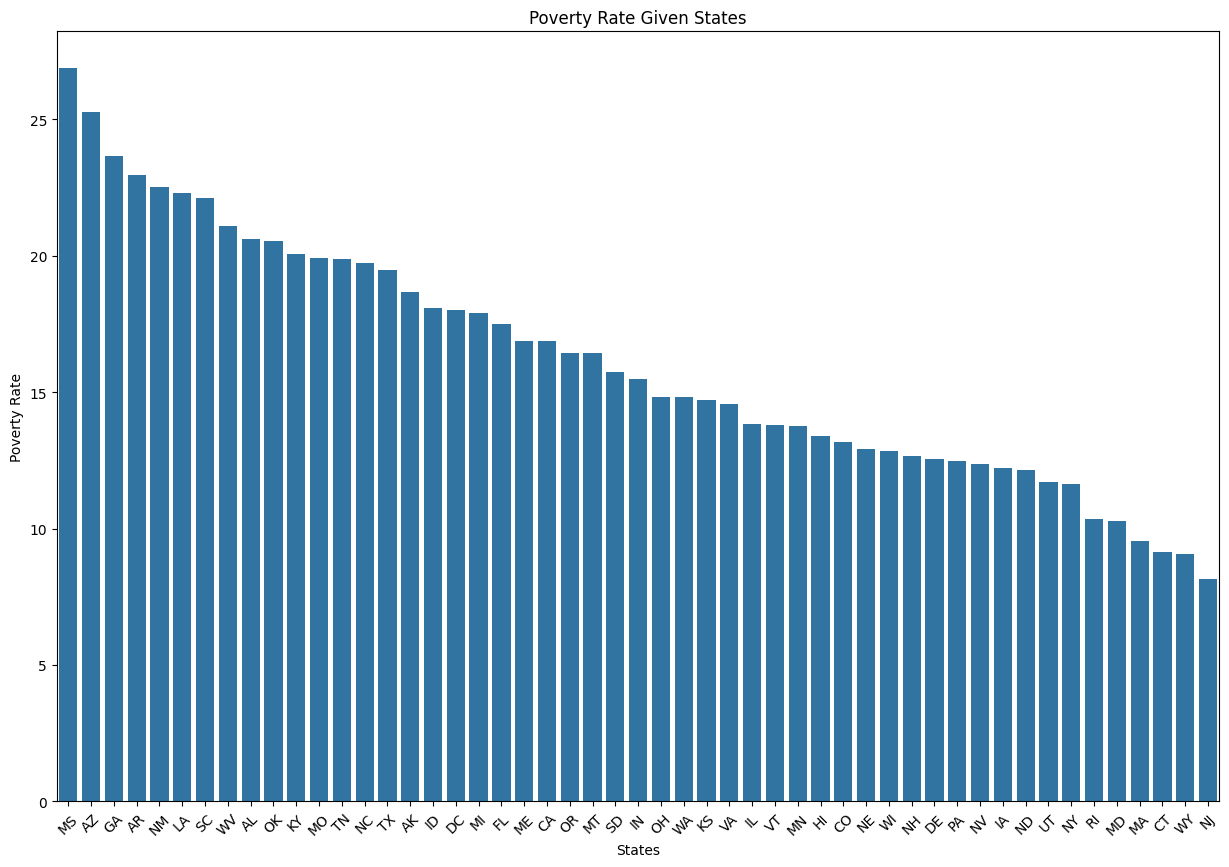

In [8]:
# Poverty rate of each state -> her bir eyalatein fakirlik oranı sıralaması
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio = []
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

# visualization , Barplot 1
plt.figure(figsize=(15,10)) # figure uzunlukları x,y
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation= 45) # x ekseni değerlerini 45 derecelik açı ile koyma
plt.xlabel('States') # x ekseni ismi
plt.ylabel('Poverty Rate') # y ekseni ismi
plt.title('Poverty Rate Given States') # plot ismi

<ipython-input-9-4f68b11366f2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x))) # palet(x) -> birbiriyle uyumlu farklı renkler


Text(0.5, 1.0, 'Most common 15 Name or Surname of killed people')

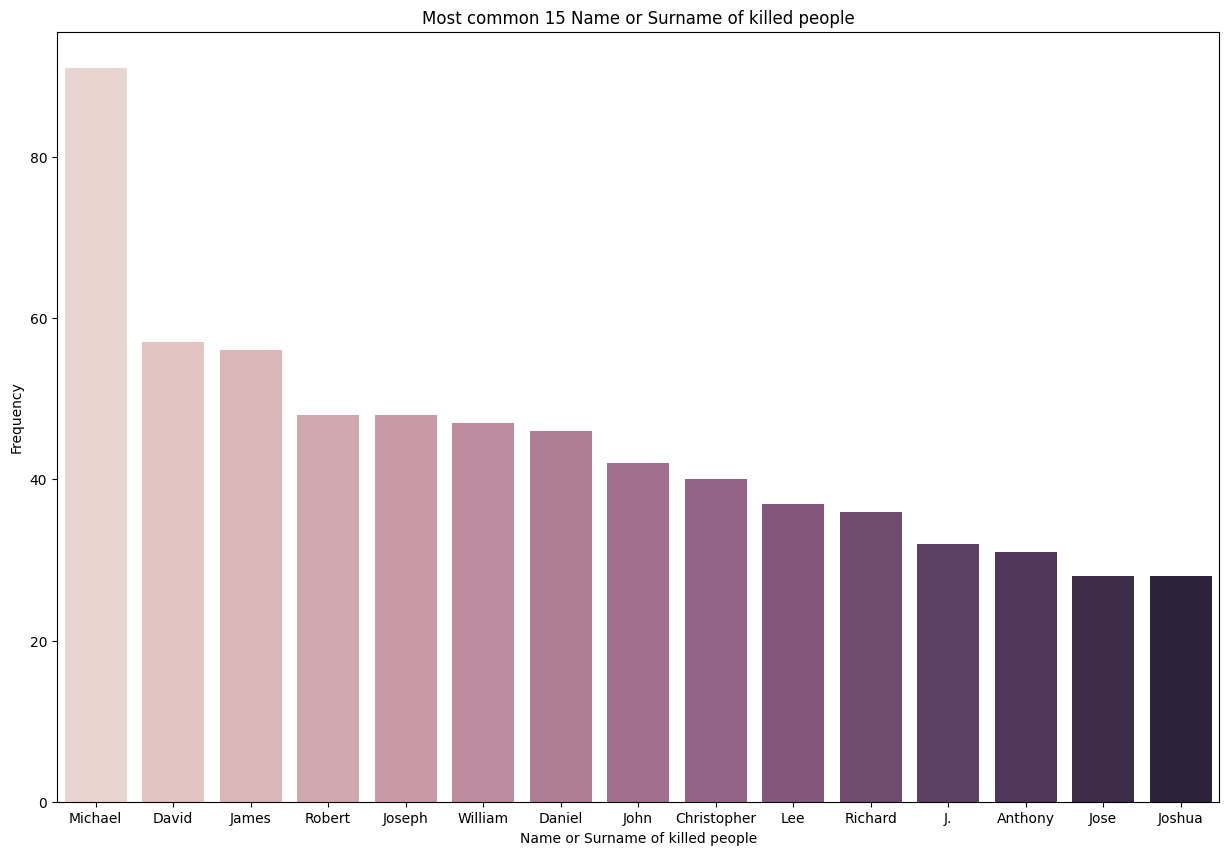

In [9]:
# Most common 15 Name or Surname of killed people
separate = kill.name[kill.name != 'TK TK'].str.split()
a,b = zip(*separate)
name_list = a+b
name_count = Counter(name_list)
most_common_names = name_count.most_common(15)
x,y = zip(*most_common_names)
x,y = list(x),list(y)

# Barplot 2
plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x))) # palet(x) -> birbiriyle uyumlu farklı renkler
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')

Text(0.5, 1.0, "Percentage of Given State's Population Above 25 that Has Graduated High School")

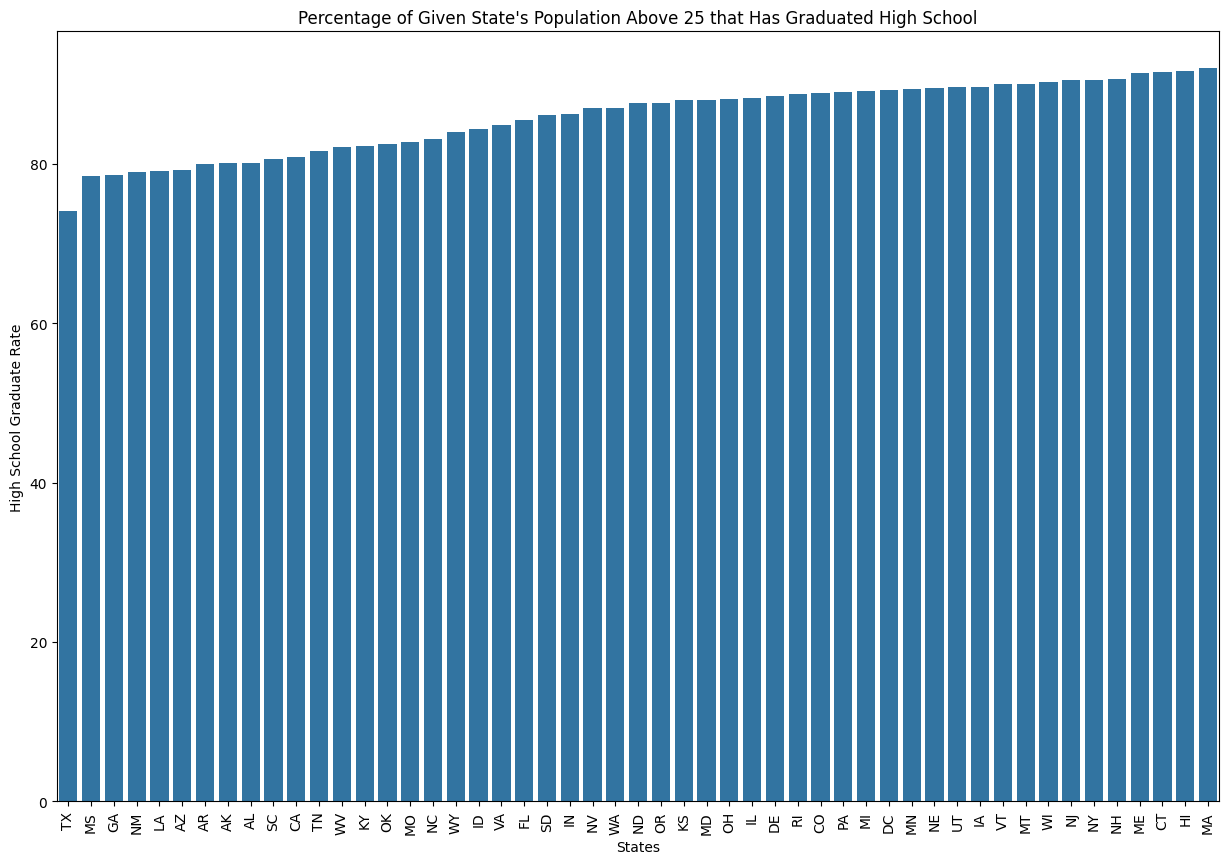

In [10]:
# High school graduation rate of the population that is older than 25 in states
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace = True)
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool = []
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
# sorting
data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)
# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['area_list'], y=sorted_data2['area_highschool_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")

[Text(0.5, 0, 'Percentage of Races'),
 Text(0, 0.5, 'States'),
 Text(0.5, 1.0, "Percentage of State's Population According to Races ")]

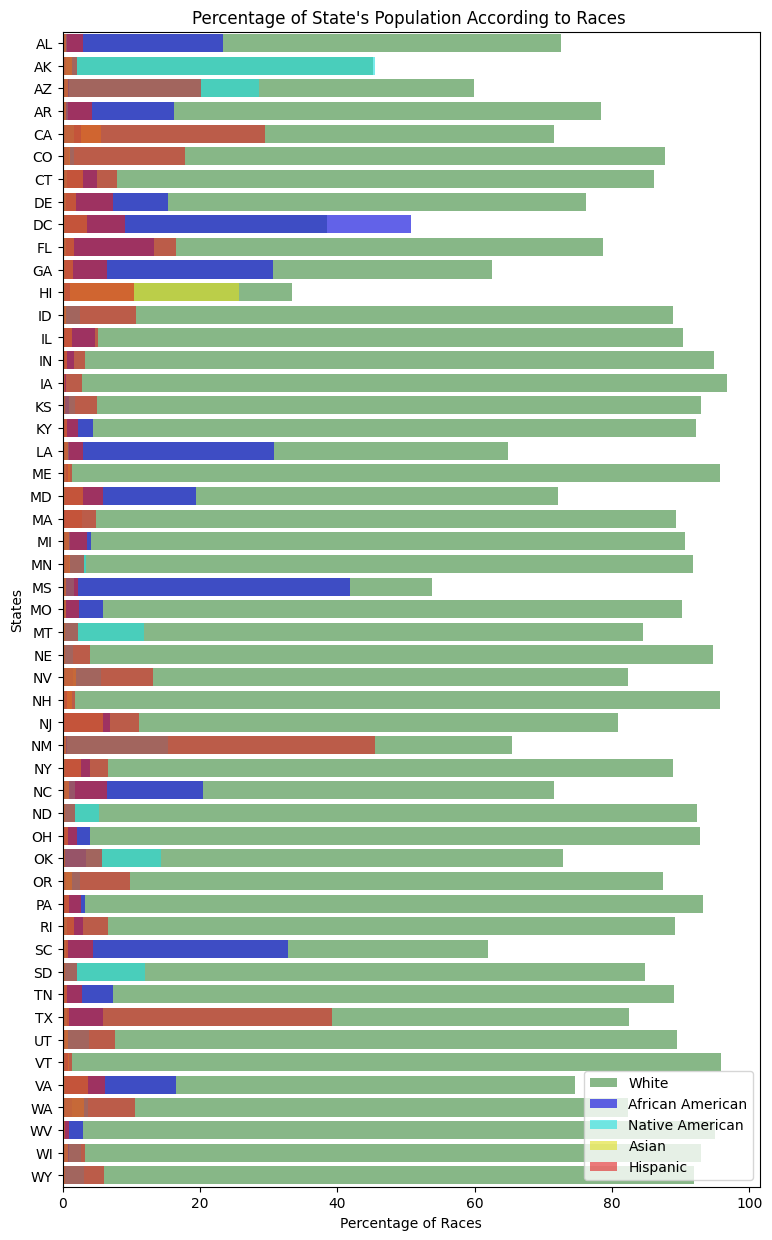

In [11]:
# Percentage of state's population according to races that are black,white,native american, asian and hispanic
share_race_city.replace(['-'],0.0,inplace = True)
share_race_city.replace(['(X)'],0.0,inplace = True)
share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
area_list = list(share_race_city['Geographic area'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for i in area_list:
    x = share_race_city[share_race_city['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(x.share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))

# visualization
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white,y=area_list,color='green',alpha = 0.5,label='White' )
sns.barplot(x=share_black,y=area_list,color='blue',alpha = 0.7,label='African American')
sns.barplot(x=share_native_american,y=area_list,color='cyan',alpha = 0.6,label='Native American')
sns.barplot(x=share_asian,y=area_list,color='yellow',alpha = 0.6,label='Asian')
sns.barplot(x=share_hispanic,y=area_list,color='red',alpha = 0.6,label='Hispanic')

ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")

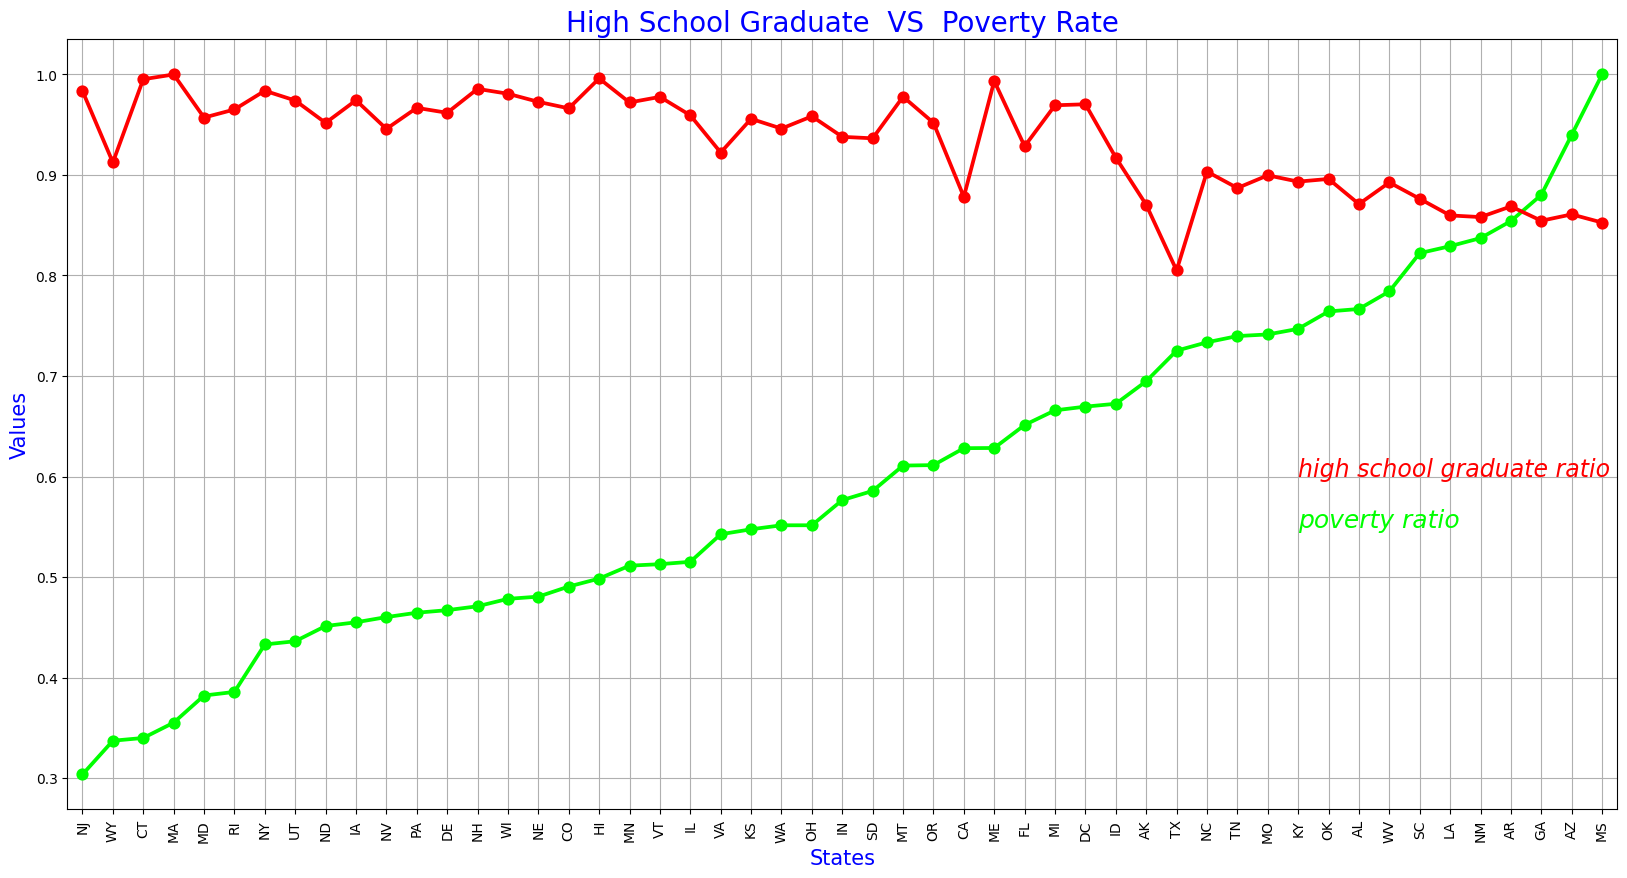

In [12]:
# high school graduation rate vs Poverty rate of each state
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio'] / max(sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio'] / max(sorted_data2['area_highschool_ratio'])
data = pd.concat([sorted_data, sorted_data2['area_highschool_ratio']], axis=1)
data.sort_values('area_poverty_ratio', inplace=True)

# visualize -> point plot
f, ax1 = plt.subplots(figsize=(20, 10)) # x ekseni uzunluğu , y ekseni uzunlugu
sns.pointplot(x='area_list', y='area_poverty_ratio', data=data, color='lime') # seaborn hangi datayı kullanacağını biliyor
sns.pointplot(x='area_list', y='area_highschool_ratio', data=data, color='red') # """"""""""""""""""""""""""""""""""""""""
plt.text(40, 0.6, 'high school graduate ratio', color='red', fontsize=17, style='italic') # textler
plt.text(40, 0.55, 'poverty ratio', color='lime', fontsize=18, style='italic')            # """"""
plt.xlabel('States', fontsize=15, color='blue')
plt.ylabel('Values', fontsize=15, color='blue')
plt.title('High School Graduate  VS  Poverty Rate', fontsize=20, color='blue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid()

# Show the plot
plt.show()


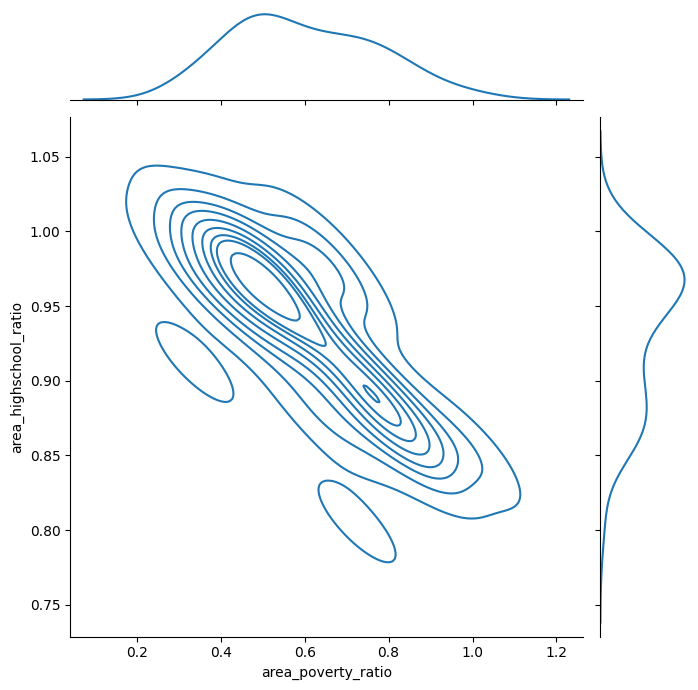

In [17]:
# Farklı deniz doğuşu kodu stiliyle her eyaletin lise mezuniyet oranı ile Yoksulluk oranının görselleştirilmesi
# ortak çekirdek yoğunluğu
# pearsonr= 1 ise pozitif korelasyon var, -1 ise negatif korelasyon var.
# Sıfır ise değişkenler arasında korelasyon(bağlantı,ilişki) yoktur
# Çekirdek yoğunluğu tahminini kullanarak ortak dağılımı göster
# Joinplot
g = sns.jointplot(x=data.area_poverty_ratio, y=data.area_highschool_ratio, kind="kde", height=7)
plt.savefig('graph.png')
plt.show()


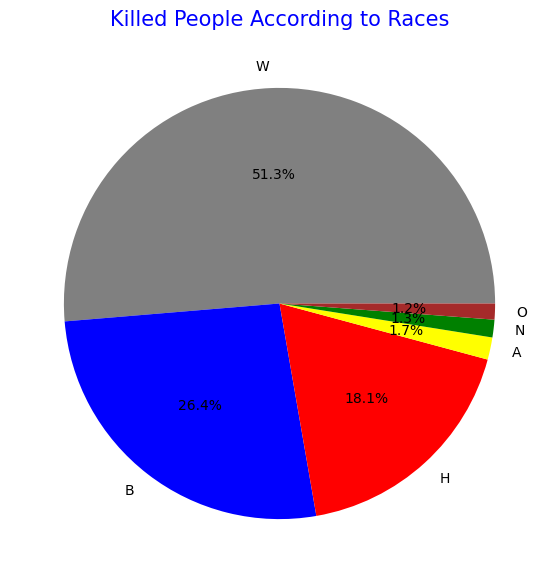

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [19]:
#Pie Chart
# Race rates according in kill data -> Öldürme verilerine göre yarış oranları
kill.race.dropna(inplace=True)  # kill verilerindeki 'race' sütunundaki NaN değerleri kaldırır

# Yarış sütunundaki farklı değerlerin sayısını alır ve etiketleri oluşturur
labels = kill.race.value_counts().index

# Pasta grafiği renkleri
colors = ['grey', 'blue', 'red', 'yellow', 'green', 'brown']

# Her dilim için patlama (explode) değeri (hepsi sıfır, yani dilimler birbirine yapışık)
explode = [0, 0, 0, 0, 0, 0]

# Her bir dilimin büyüklüğünü alır
sizes = kill.race.value_counts().values

# Görsel oluşturma
plt.figure(figsize=(7, 7))
  # size(degerler) , explode(list), label = isimler, renkler, sayimin ondalik kismi
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Killed People According to Races', color='blue', fontsize=15)
plt.show()

kill.race.value_counts() #  değerlerin sayısı

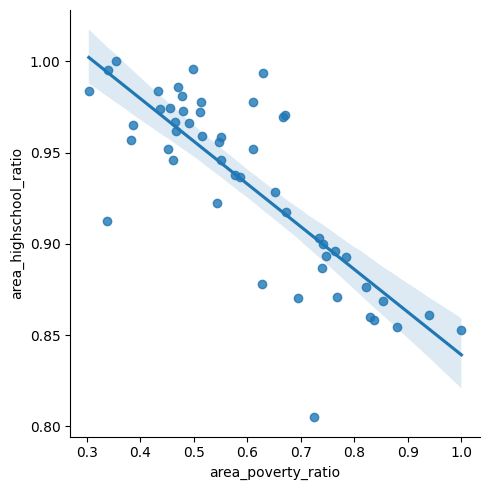

In [20]:
# Lm Plot
# Farklı deniz doğuşu kodu stiliyle her eyaletin lise mezuniyet oranı ile Yoksulluk oranının görselleştirilmesi
# implot
# Her veri kümesindeki Linear Regression (doğrusal regresyonun) sonuçlarını göster

sns.lmplot(x="area_poverty_ratio", y="area_highschool_ratio", data=data)
plt.show()
#

<ipython-input-22-c2f855c9bdaf>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data.area_poverty_ratio, y=data.area_highschool_ratio, shade=True, cut=3)


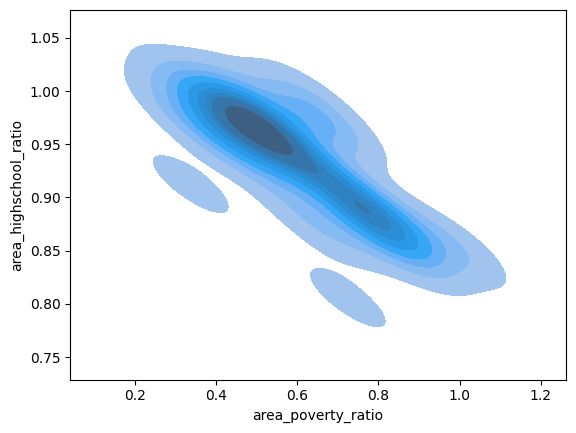

In [22]:
# Kde Plot
# Farklı deniz doğuşu kodu stiliyle her eyaletin lise
# mezuniyet oranı ile Yoksulluk oranının görselleştirilmesi
# cubehelix grafiği
sns.kdeplot(x=data.area_poverty_ratio, y=data.area_highschool_ratio, shade=True, cut=3)
plt.show()

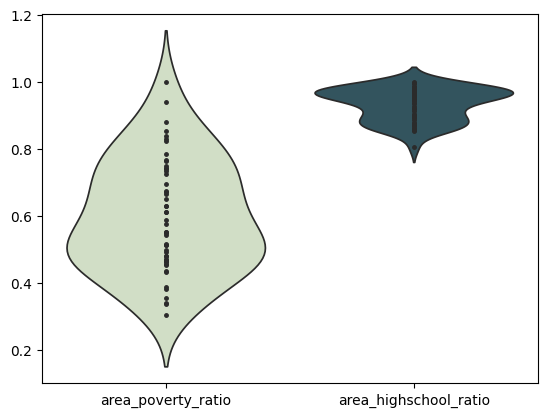

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


In [24]:
# Violin Plot
# Her dağıtımı hem kemanlarla hem de puanlarla göster
# Özel bir sıralı palet elde etmek için cubehelix'i kullanın
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=data, palette=pal, inner="points")
plt.show()

data.head()

<ipython-input-25-977592afa001>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)


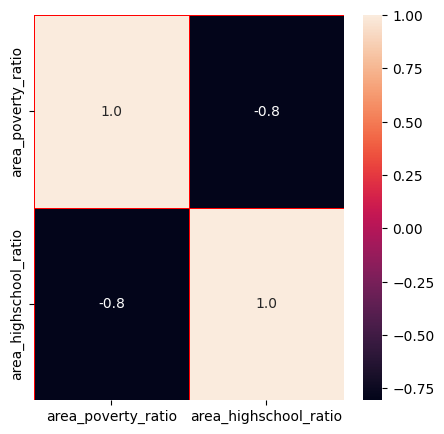

In [25]:
# correlation map
# Farklı deniz doğuşu kodu stiliyle her eyaletin lise mezuniyet oranı ile Yoksulluk oranının görselleştirmesi

# Subplot oluşturuluyor (figsize=(5, 5) boyutunda)
f, ax = plt.subplots(figsize=(5, 5))

# seaborn kütüphanesinin heatmap fonksiyonu kullanılarak korelasyon matrisi çiziliyor
# - data.corr(): Veri çerçevesindeki değişkenler arasındaki korelasyon matrisini elde eder.
# - annot=True: Her hücredeki değerlerin görüntülenmesini sağlar.
# - linewidths=0.5: Hücreler arasındaki çizgilerin kalınlığını belirler.
# - linecolor="red": Çizgilerin rengini belirler.
# - fmt='.1f': Hücre değerlerinin ondalık basamak sayısını belirler.
# - ax=ax: Oluşturulan heatmap'i subplot'a yerleştirir.
sns.heatmap(data.corr(), annot=True, linewidths=0.5, linecolor="red", fmt='.1f', ax=ax)

# Plot'u ekranda gösterir
plt.show()


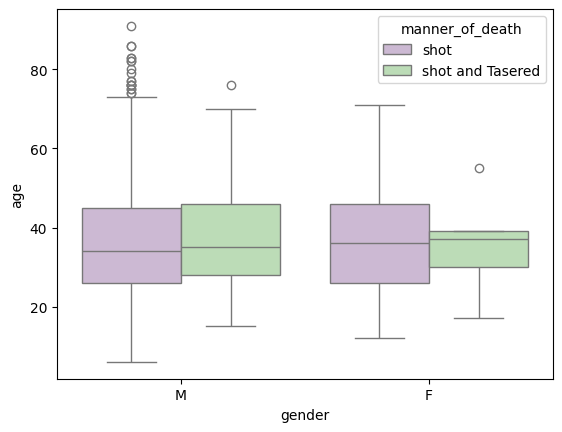

In [26]:
#Box plot
# ölüm şekli(olum sekli) : ateş ettirilir, ateş edilir ve sok tabancayla
# cinsiyet
# yaş
# Yörünge periyodunu yatay kutularla çizin

# seaborn kütüphanesinin boxplot fonksiyonu kullanılarak kutu grafiği çiziliyor
# - x="gender": x-eksenine "gender" (cinsiyet) değişkenini yerleştirir.
# - y="age": y-eksenine "age" (yaş) değişkenini yerleştirir.
# - hue="manner_of_death": Renklendirme için "manner_of_death" (ölüm şekli) değişkenini kullanır.
# - data=kill: Veri çerçevesini belirtir.
# - palette="PRGn": Renk paletini belirler.
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=kill, palette="PRGn")

# Plot'u ekranda gösterir
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 47.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 67.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


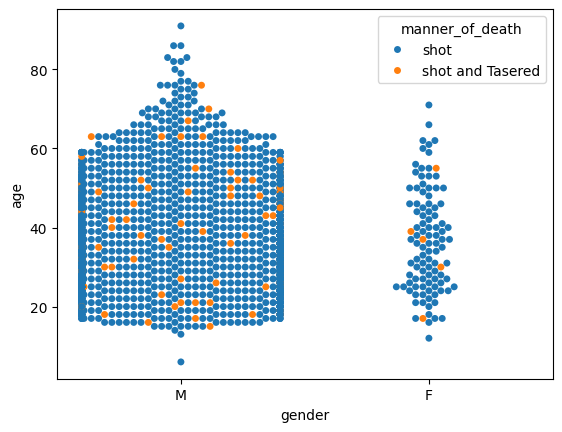

In [28]:
# swarm plot
# manner of death(olum sekli) : ates edilerek, ates edilerek ve sok tabancasiyla
# gender cinsiyet
# age: yas

# seaborn kütüphanesinin swarmplot fonksiyonu kullanılarak sürü grafiği çiziliyor
# - x="gender": x-eksenine "gender" (cinsiyet) değişkenini yerleştirir.
# - y="age": y-eksenine "age" (yaş) değişkenini yerleştirir.
# - hue="manner_of_death": Renklendirme için "manner_of_death" (ölüm şekli) değişkenini kullanır.
# - data=kill: Veri çerçevesini belirtir.
sns.swarmplot(x="gender", y="age", hue="manner_of_death", data=kill)

# Plot'u ekranda gösterir
plt.show()


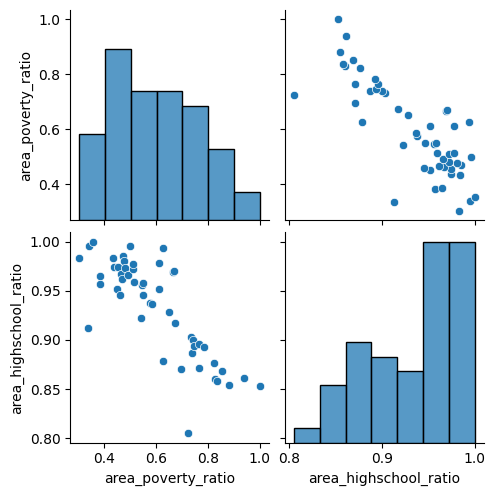

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


In [30]:
# pair plot
sns.pairplot(data)
plt.show()

data.head()

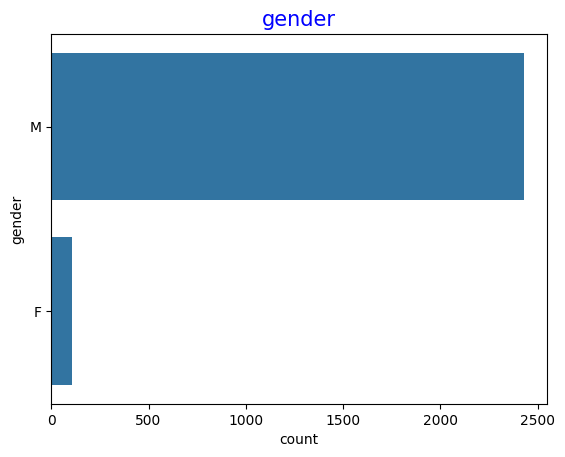

M    2428
F     107
Name: gender, dtype: int64

In [35]:
# Manner of death
# seaborn kütüphanesinin countplot fonksiyonu kullanılarak cinsiyetin sayısını görselleştiriyor
# - kill.gender: Veri çerçevesindeki "gender" (cinsiyet) değişkenini kullanır.
sns.countplot(kill.gender)

# Grafiğin başlığını ekler
plt.title("gender", color='blue', fontsize=15)

# Plot'u ekranda gösterir
plt.show()

kill.gender.value_counts()


gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
                ... 
hand torch         1
garden tool        1
pole               1
pick-axe           1
pen                1
Name: armed, Length: 68, dtype: int64


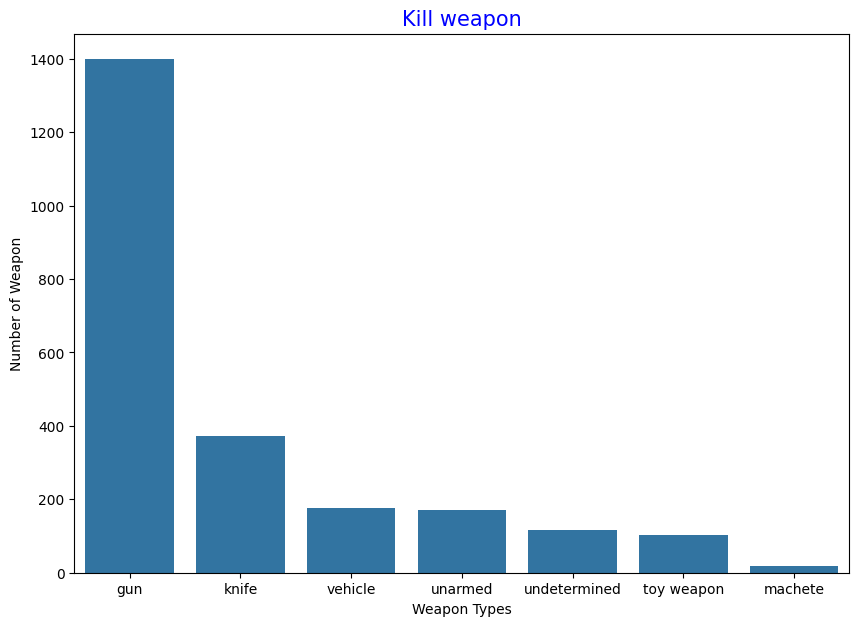

In [37]:
# kill weapon
armed = kill.armed.value_counts()
print(armed)
# Grafiğin boyutunu belirler (genişlik: 10 birim, yükseklik: 7 birim)
plt.figure(figsize=(10, 7))

# seaborn kütüphanesinin barplot fonksiyonu kullanılarak çubuk grafik çiziliyor
# - x=armed[:7].index: x-eksenine silah türlerinin ilk yedi tanesinin indeksini yerleştirir.
# - y=armed[:7].values: y-eksenine silah türlerinin ilk yedi tanesinin değerlerini yerleştirir.
sns.barplot(x=armed[:7].index, y=armed[:7].values)

# y-eksenine etiket ekler
plt.ylabel('Number of Weapon')

# x-eksenine etiket ekler
plt.xlabel('Weapon Types')

# Grafiğin başlığını ekler
plt.title('Kill weapon', color='blue', fontsize=15)

# Plot'u ekranda gösterir
plt.show()
